We shall investigate what bioinformatics is all about in this project.

We'll utilise a dataset from the UCI Machine Learning response for a tale that contains 100 DNA sequences with 57 sequential nucleotides for this project.

We'll learn how to use data from the UCI repositories to train classification algorithms and compare and contrast classification machine learning techniques.

In [1]:
# Import libraries
import sys
import numpy as np
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the ICU Molecular Biology (Promoter Gene Sequences) Data Set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data"


In [3]:
url

'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'

In [4]:
names = ["Class", "id", "Sequence"]


In [5]:
data = pd.read_csv(url, names = names)


In [6]:
data

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...,...
101,-,799,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,-,987,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,-,1226,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,-,794,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...


In [7]:
# Building our Dataset by creating a custom Pandas Dataframe
# Each column in a Dataframe is called a Series. 
classes = data.loc[:,"Class"]

In [8]:
print(classes)

0      +
1      +
2      +
3      +
4      +
      ..
101    -
102    -
103    -
104    -
105    -
Name: Class, Length: 106, dtype: object


A promoter is a sequence of DNA needed to turn a gene on or off. The process of transcription is initiated at the promoter. Usually found the beginning of a gene, the promoter has a binding site for the enzyme used to make a messenger RNA (mRNA) molecule.

According to this dataset:

"+" means the promoters
"-" means is anything that is not promoters.



Generating a DNA Sequence

Data Preparation 

Nucleic acids are made up of nucleotides, which are the basic building blocks.

Long chains of nucleotides make up RNA and DNA, which are polmyers.

A nucleotide is made up of a sugar molecule (ribose in RNA or deoxyriboe in DNA) that is joined to a phosphate group and a nitrogen-containing base by a phosphate group.

Adenine (A), cytosine (C), guanine (G), and thymine (T) are the bases in DNA (T). The nucleotide uracil (U) replaces thymine in RNA.

Sequencing DNA means determining the order of the four chemical building blocks - called "bases" - that make up the DNA molecule. The sequence tells scientists the kind of genetic information that is carried in a particular DNA segment.



In [9]:
# generate list of DNA sequence
sequences = list(data.loc[: , "Sequence"])
dataset = {}

# loop hrough sequences and split into individual nucleotides
for i, seq in enumerate(sequences):

  # split into nucleotides, remove ta characters
  nucleotides = list(seq)
  nucleotides = [x for x in nucleotides if x != '\t']

  # append class assignment
  nucleotides.append(classes[i])

  # add to dataset
  dataset[i] = nucleotides

print(dataset[0])

['t', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g', 't', '+']


In [10]:
# turn dataset into pandas DataFrame
dframe = pd.DataFrame(dataset)

# print the dataframe using tabulate packages in a tab-separated format
dframe


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,g,c,g,c,t,a,a,a,t,g,g,a,t,a,a,t,c,t,a,t,c,a,a,t,a,c,t,c,t,t,...,t,t,a,a,g,t,t,t,c,t,c,a,t,t,c,g,a,t,t,t,t,c,t,a,g,a,a,t,t,a,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,c,c,a,t,t,a,t,a,c,c,a,a,c,c,a,t,a,c,c,g,t,t,t,a,t,c,c,c,t,g,...,t,a,a,a,a,t,a,g,a,t,a,g,c,g,t,c,t,g,c,a,a,a,t,c,g,a,g,g,g,g,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,a,t,t,g,t,g,g,a,t,a,c,a,t,c,a,g,t,c,a,t,g,t,g,a,g,t,g,g,c,t,...,a,t,c,g,a,a,t,c,t,c,t,g,t,a,a,g,c,g,t,t,g,g,a,g,t,c,a,t,c,g,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,a,g,c,c,a,c,c,c,c,a,a,a,g,g,t,t,c,a,g,g,t,a,c,a,c,t,t,t,g,a,...,c,t,g,t,g,g,t,t,g,g,g,a,c,a,t,g,c,c,c,t,a,c,c,c,g,c,c,t,a,c,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,a,a,a,a,t,a,a,a,a,a,c,a,a,g,t,c,c,g,t,c,t,c,g,a,a,g,t,t,c,a,...,t,c,a,g,a,a,c,g,a,t,t,g,a,g,a,c,c,g,g,g,g,g,g,t,t,a,g,g,c,a,g,a,a,g,g,a,t,a,t,a
5,g,t,a,t,a,c,g,a,t,a,a,a,a,a,a,a,t,a,a,t,c,c,a,a,a,a,t,t,t,a,g,a,c,a,a,a,g,t,a,a,...,g,t,g,c,c,g,g,a,a,c,c,g,a,t,t,a,t,t,t,g,g,g,t,a,t,t,t,a,g,t,t,g,c,g,c,a,c,c,c,t
6,c,c,g,g,a,a,g,c,a,a,a,a,a,t,t,a,t,t,c,a,a,g,a,a,a,t,c,a,a,g,t,a,a,a,t,a,t,a,t,c,...,t,c,t,t,c,a,t,a,c,t,a,a,c,g,g,g,a,c,g,c,g,c,t,a,t,t,c,t,g,g,a,g,c,t,a,t,t,t,c,t
7,a,c,a,a,t,a,t,a,a,t,t,t,a,t,t,g,t,t,g,a,t,t,t,g,a,a,g,t,t,t,t,a,a,c,t,a,a,t,a,t,...,g,a,c,t,a,g,c,a,t,c,g,a,a,c,c,c,a,t,g,t,t,a,g,c,t,c,t,t,g,t,g,a,g,g,t,g,c,a,t,a
8,a,t,g,t,t,g,g,a,t,t,a,t,a,t,t,a,t,t,t,t,c,c,g,a,a,a,c,a,c,t,c,a,c,t,t,a,t,t,t,a,...,a,a,a,a,c,c,t,g,c,c,c,c,a,t,g,a,t,a,a,t,g,g,g,g,g,c,c,t,t,a,a,c,a,t,g,g,a,c,c,a
9,t,g,a,g,a,g,g,a,a,t,a,c,a,t,t,a,t,c,a,c,g,a,a,a,t,t,a,a,c,t,a,a,g,a,t,a,a,t,t,a,...,a,c,a,g,g,a,c,g,a,g,c,t,g,t,c,c,g,t,t,g,t,c,c,c,c,g,t,t,t,a,c,t,a,a,t,c,a,g,a,t


In [11]:
# transpose the dataframe
df = dframe.transpose()

# print the dataframe using tabulate packages in a tab-separated format
df.iloc[:5]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,a,c,g,c,t,t,g,c,g,t,t,c,g,g,t,g,g,t,t,a,a,g,t,a,t,g,t,a,t,a,a,t,g,c,g,c,g,g,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,a,c,a,g,t,t,g,t,c,a,c,g,c,t,g,a,t,t,g,g,t,g,t,c,g,t,t,a,c,a,a,t,c,t,a,a,c,g,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,a,c,t,a,g,t,g,c,a,t,t,a,g,c,t,t,a,t,t,t,t,t,t,t,g,t,t,a,t,c,a,t,g,c,t,a,a,c,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,t,g,t,a,t,c,g,a,a,g,t,g,t,g,t,t,g,c,g,g,a,g,t,a,g,a,t,g,t,t,a,g,a,a,t,a,c,t,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,a,c,t,a,t,t,g,a,c,g,a,a,a,a,g,c,t,g,a,a,a,a,c,c,a,c,t,a,g,a,a,t,g,c,g,c,c,t,c,c,g,t,g,g,t,a,g,+


In [12]:
# rename the last column as class

df.rename(columns = {57 : "Class"}, inplace = True)
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,a,c,g,c,t,t,g,c,g,t,t,c,g,g,t,g,g,t,t,a,a,g,t,a,t,g,t,a,t,a,a,t,g,c,g,c,g,g,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,a,c,a,g,t,t,g,t,c,a,c,g,c,t,g,a,t,t,g,g,t,g,t,c,g,t,t,a,c,a,a,t,c,t,a,a,c,g,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,a,c,t,a,g,t,g,c,a,t,t,a,g,c,t,t,a,t,t,t,t,t,t,t,g,t,t,a,t,c,a,t,g,c,t,a,a,c,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,t,g,t,a,t,c,g,a,a,g,t,g,t,g,t,t,g,c,g,g,a,g,t,a,g,a,t,g,t,t,a,g,a,a,t,a,c,t,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,a,c,t,a,t,t,g,a,c,g,a,a,a,a,g,c,t,g,a,a,a,a,c,c,a,c,t,a,g,a,a,t,g,c,g,c,c,t,c,c,g,t,g,g,t,a,g,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,c,c,t,c,a,a,t,g,g,c,c,t,c,t,a,a,a,c,g,g,g,t,c,t,t,g,a,g,g,g,g,t,t,t,t,t,t,g,c,t,g,a,a,a,g,g,a,g,g,a,a,c,t,a,t,a,t,-
102,g,t,a,t,t,c,t,c,a,a,c,a,a,g,a,t,t,a,a,c,c,g,a,c,a,g,a,t,t,c,a,a,t,c,t,c,g,t,g,g,a,t,g,g,a,c,g,t,t,c,a,a,c,a,t,t,g,-
103,c,g,c,g,a,c,t,a,c,g,a,t,g,a,g,a,t,g,c,c,t,g,a,g,t,g,c,t,t,c,c,g,t,t,a,c,t,g,g,a,t,t,g,t,c,a,c,c,a,a,g,g,c,t,t,c,c,-
104,c,t,c,g,t,c,c,t,c,a,a,t,g,g,c,c,t,c,t,a,a,a,c,g,g,g,t,c,t,t,g,a,g,g,g,g,t,t,t,t,t,t,g,c,t,g,a,a,a,g,g,a,g,g,a,a,c,-


In [13]:
# looks good. Let's start to familiarize ourselves with the dataset so we can pick the most suitable

df.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,Class
count,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106,106
unique,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,2
top,t,a,a,c,a,a,a,a,a,a,a,c,t,c,t,t,g,a,c,a,t,a,g,t,t,g,g,t,t,a,a,a,t,t,c,t,t,t,t,a,a,t,t,t,g,c,c,c,c,c,c,t,t,c,c,c,t,+
freq,38,34,30,30,36,42,38,34,33,36,38,31,34,38,54,54,53,40,44,31,34,31,30,32,32,34,29,32,35,35,37,31,41,39,27,34,43,32,35,45,41,33,42,36,34,35,31,32,36,42,31,33,35,32,29,29,34,53


In [14]:
# Target Column Visualization

def visualize_target(plot, feature):
  total = len(feature)
  for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)
  plt.show()

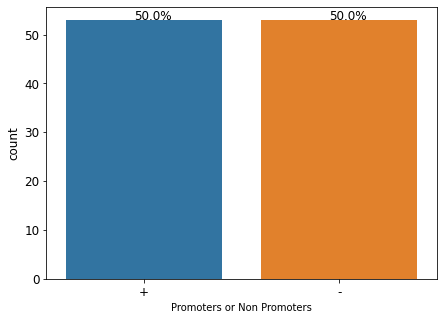

<Figure size 432x288 with 0 Axes>

In [15]:
plt.figure(figsize=(7,5))
ax = sns.countplot("Class", data = df)
plt.xticks(size = 12)
plt.xlabel("Promoters or Non Promoters")
plt.yticks(size = 12)
plt.ylabel("count", size = 12)

visualize_target(ax, df.Class)
plt.savefig("target_histogram")


In [16]:
# describe  doesn't tell us enough information since the attributes are text. Let's record alue counts for each sequence

series = []

for name in df.columns:
  series.append(df[name].value_counts())

info = pd.DataFrame(series)
details = info.transpose()
details


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,Class
t,38.0,26.0,27.0,26.0,22.0,24.0,30.0,32.0,32.0,28.0,31.0,29.0,34.0,21.0,54.0,54.0,24.0,18.0,23.0,24.0,34.0,26.0,27.0,32.0,32.0,30.0,24.0,32.0,35.0,19.0,31.0,25.0,41.0,39.0,27.0,34.0,43.0,32.0,35.0,27.0,27.0,33.0,42.0,36.0,29.0,22.0,24.0,27.0,21.0,22.0,23.0,33.0,35.0,30.0,23.0,29.0,34.0,NaN
c,27.0,22.0,21.0,30.0,19.0,18.0,21.0,20.0,22.0,22.0,22.0,31.0,14.0,38.0,13.0,24.0,14.0,29.0,44.0,24.0,22.0,20.0,27.0,21.0,21.0,14.0,25.0,30.0,20.0,26.0,17.0,22.0,24.0,22.0,27.0,24.0,17.0,21.0,20.0,13.0,20.0,27.0,17.0,31.0,15.0,35.0,31.0,32.0,36.0,42.0,31.0,32.0,21.0,32.0,29.0,29.0,17.0,NaN
a,26.0,34.0,30.0,22.0,36.0,42.0,38.0,34.0,33.0,36.0,38.0,21.0,29.0,24.0,23.0,17.0,15.0,40.0,27.0,31.0,28.0,31.0,22.0,24.0,29.0,28.0,28.0,17.0,18.0,35.0,37.0,31.0,24.0,19.0,27.0,22.0,20.0,27.0,34.0,45.0,41.0,19.0,22.0,20.0,28.0,25.0,27.0,25.0,23.0,24.0,28.0,27.0,25.0,22.0,26.0,24.0,27.0,NaN
g,15.0,24.0,28.0,28.0,29.0,22.0,17.0,20.0,19.0,20.0,15.0,25.0,29.0,23.0,16.0,11.0,53.0,19.0,12.0,27.0,22.0,29.0,30.0,29.0,24.0,34.0,29.0,27.0,33.0,26.0,21.0,28.0,17.0,26.0,25.0,26.0,26.0,26.0,17.0,21.0,18.0,27.0,25.0,19.0,34.0,24.0,24.0,22.0,26.0,18.0,24.0,14.0,25.0,22.0,28.0,24.0,28.0,NaN
+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0
-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0


In [17]:
# Unfortunately, we can't run machine learning algorithms on the data in 'String' formats. As a result, we need to switch it to numerical data. 
# This can easily be accomplished using the pd.get_dummies() function
numerical_df = pd.get_dummies(df)
numerical_df.head()


,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,2_g,2_t,3_a,3_c,3_g,3_t,4_a,4_c,4_g,4_t,5_a,5_c,5_g,5_t,6_a,6_c,6_g,6_t,7_a,7_c,7_g,7_t,8_a,8_c,8_g,8_t,9_a,9_c,9_g,9_t,...,47_g,47_t,48_a,48_c,48_g,48_t,49_a,49_c,49_g,49_t,50_a,50_c,50_g,50_t,51_a,51_c,51_g,51_t,52_a,52_c,52_g,52_t,53_a,53_c,53_g,53_t,54_a,54_c,54_g,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class_+,Class_-
0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0
1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0


In [18]:
# We don't need both class columns.  Lets drop one then rename the other to simply 'Class'.
df = numerical_df.drop(columns=['Class_-'])

df.rename(columns = {'Class_+': 'Class'}, inplace = True)
df.head()


,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,2_c,2_g,2_t,3_a,3_c,3_g,3_t,4_a,4_c,4_g,4_t,5_a,5_c,5_g,5_t,6_a,6_c,6_g,6_t,7_a,7_c,7_g,7_t,8_a,8_c,8_g,8_t,9_a,9_c,9_g,9_t,...,47_c,47_g,47_t,48_a,48_c,48_g,48_t,49_a,49_c,49_g,49_t,50_a,50_c,50_g,50_t,51_a,51_c,51_g,51_t,52_a,52_c,52_g,52_t,53_a,53_c,53_g,53_t,54_a,54_c,54_g,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t,Class
0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1
1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1
3,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1
4,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1


Modeling
Splitting the dataset into training test and test set

In [19]:
# Use the model_selection module to separate training and testing datasets
from sklearn import model_selection

# Create X and Y datasets for training
X = np.array(df.drop(['Class'], 1))
y = np.array(df['Class'])

# define seed for reproducibility
seed = 1

# split data into training and testing datasets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=seed)

In [23]:
# Now that we have our dataset, we can start building algorithms! We'll need to import each algorithm we plan on using from sklearn.  
# We also need to import some performance metrics, such as accuracy_score and classification_report.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

#define scoring method
scoring ='accuracy'

#define the model to train
names = ["Nearest Neighbors", "Gaussian Process","Decision Tree","Random Forest",
         "Neural Net", "AdaBoost","Naive Bayes","SVM Linear","SVM RBF","SVM Sigmoid"]
classifiers =[
    KNeighborsClassifier(n_neighbors=3),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10,max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    SVC(kernel='linear'),
    SVC(kernel='rbf'),
    SVC(kernel='sigmoid')
]
models =zip(names,classifiers)

# evaluate each model in turn
results = []
names=[]
accuracy = []
for name,model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    
    print(msg)
    model.fit(X_train,y_train)
    predictions= model.predict(X_test)
    print(name)
    print( classification_report(y_test,predictions))

Nearest Neighbors: 0.837500 (0.125623)
Nearest Neighbors
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        17
           1       0.62      1.00      0.77        10

    accuracy                           0.78        27
   macro avg       0.81      0.82      0.78        27
weighted avg       0.86      0.78      0.78        27

Gaussian Process: 0.873214 (0.056158)
Gaussian Process
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.77      1.00      0.87        10

    accuracy                           0.89        27
   macro avg       0.88      0.91      0.89        27
weighted avg       0.91      0.89      0.89        27

Decision Tree: 0.725000 (0.165831)
Decision Tree
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        17
           1       0.77      1.00      0.87        10

    accuracy         

In [24]:
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

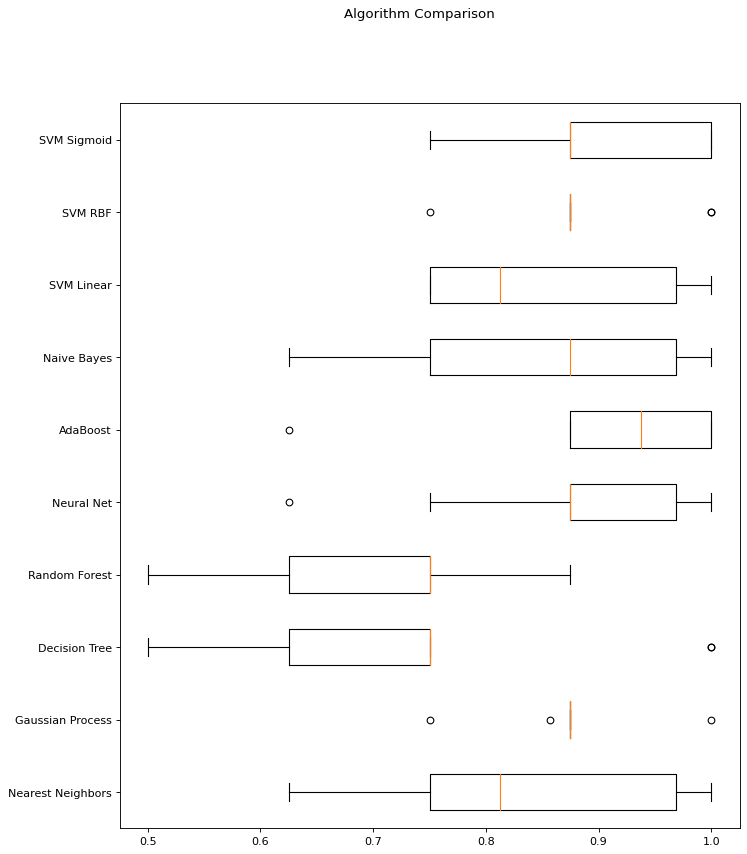

<Figure size 432x288 with 0 Axes>

In [25]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,12), dpi = 80)
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=False)
ax.set_yticklabels(names)
plt.show()
plt.savefig("algorithm_comparison.png")
